In [1]:
'''
Import python packages
'''
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pacmap
from hdbscan import HDBSCAN
import shap
import pandas as pd
import numpy as np
shap.initjs()
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
'''
Load data
'''
datafile = pd.read_csv('../../data/clean_RawData.csv')

# Check if 'INDEX' column exists and drop it if it does
if 'INDEX' in datafile.columns:
    datafile = datafile.drop('INDEX', axis=1)

print(datafile.head())

   Unnamed: 0    XMEAS1       XMEAS2       XMEAS3    XMEAS4     XMEAS5  \
0           1  0.271033  3649.739415  4451.320791  9.223142  32.392900   
1           2  0.270826  3653.341885  4488.640140  9.211980  32.501953   
2           3  0.270474  3688.113265  4432.832766  9.235690  32.402838   
3           4  0.272127  3651.680041  4459.268940  9.192009  31.876790   
4           5  0.270939  3636.329271  4460.409756  9.277992  32.424754   

      XMEAS6       XMEAS7     XMEAS8      XMEAS9  ...    XMEAS22       XMV1  \
0  47.559754  2798.975799  64.995825  122.898796  ...  92.262531  62.806984   
1  47.374855  2800.296214  65.091251  122.877519  ...  92.492697  62.819324   
2  47.817088  2802.647777  64.812363  122.916165  ...  92.368550  62.836835   
3  47.869249  2803.693084  64.205417  122.892493  ...  92.310705  62.848190   
4  47.509322  2804.787223  64.598623  122.890514  ...  92.215839  62.848341   

        XMV2       XMV3       XMV4       XMV6       XMV7       XMV8  \
0  53.286

In [3]:
datafile.keys()

Index(['Unnamed: 0', 'XMEAS1', 'XMEAS2', 'XMEAS3', 'XMEAS4', 'XMEAS5',
       'XMEAS6', 'XMEAS7', 'XMEAS8', 'XMEAS9', 'XMEAS10', 'XMEAS11', 'XMEAS12',
       'XMEAS13', 'XMEAS14', 'XMEAS15', 'XMEAS16', 'XMEAS17', 'XMEAS18',
       'XMEAS19', 'XMEAS20', 'XMEAS21', 'XMEAS22', 'XMV1', 'XMV2', 'XMV3',
       'XMV4', 'XMV6', 'XMV7', 'XMV8', 'XMV10', 'XMV11'],
      dtype='object')

In [4]:
 #4. Split the data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_data, test_data= train_test_split(datafile,train_size=0.7, test_size=0.3, random_state=60)
validation_data, test_data = train_test_split(test_data,train_size=0.50, test_size=0.50, random_state=60)

print(f'Length of framework is: {len(datafile)}\n',
      f'Length of training data is: {len(train_data)}\n',
      f'Length of test data is: {len(test_data)}\n',
      f'Length of validation data is: {len(validation_data)}\n')

Length of framework is: 1995
 Length of training data is: 1396
 Length of test data is: 300
 Length of validation data is: 299



In [5]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler
Norm =MinMaxScaler()
train_data_normalized=pd.DataFrame(Norm.fit_transform(train_data))
train_data_normalized

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.934270,0.619302,0.547377,0.348319,0.339101,0.814428,0.816266,0.343137,0.206879,0.198479,...,0.870027,0.506677,0.279590,0.472771,0.331744,0.001612,0.498881,0.711676,0.936341,0.405136
1,0.980933,0.003323,0.373715,0.349525,0.279702,0.375540,0.384848,0.553326,0.681733,0.491970,...,0.546737,0.328048,0.308146,1.000000,0.313770,0.385568,0.441468,0.573721,0.480033,0.485658
2,0.446563,0.354688,0.325023,0.201013,0.449117,0.779842,0.718445,0.534793,0.610284,0.602473,...,0.858970,0.309297,0.154595,0.270199,0.462316,0.257289,0.292323,0.615305,0.807797,0.277610
3,0.512795,0.426927,0.368621,0.337967,0.532981,0.639324,0.680352,0.447239,0.484486,0.516680,...,0.887029,0.234608,0.268501,0.323160,0.440352,1.000000,0.030935,0.110520,0.707151,0.329957
4,0.667336,0.389784,0.337256,0.279257,0.456573,0.878028,0.875103,0.517191,0.544406,0.555145,...,0.896116,0.385175,0.217521,0.295521,0.493062,0.010899,0.334545,0.392553,0.900263,0.251174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,0.200201,0.390040,0.403831,0.263944,0.637670,0.776460,0.817326,0.538410,0.478747,0.667525,...,0.895633,0.336460,0.279937,0.295920,0.585622,0.490156,0.211529,0.501767,0.841120,0.169090
1392,0.711490,0.217041,0.248820,0.119219,0.562458,0.721585,0.698272,0.377439,0.566617,0.489309,...,0.819278,0.218627,0.069507,0.164701,0.539297,0.001846,0.373138,0.962278,0.827046,0.127693
1393,0.805820,0.283438,0.288028,0.197856,0.548002,0.748529,0.704658,0.565687,0.488133,0.526167,...,0.843402,0.249452,0.158215,0.213960,0.471381,0.349864,0.295159,0.528898,0.756639,0.306375
1394,0.546412,0.155347,0.169504,0.179721,0.554217,0.794922,0.748676,0.458218,0.572733,0.257930,...,0.825309,0.122075,0.097597,0.116446,0.570925,0.005664,0.299397,0.871253,0.757869,0.276053


In [6]:
#PCA
pca = PCA(n_components=2)
df_2d = pca.fit_transform(train_data_normalized)

In [36]:
pca.components_

array([[-0.3492911 ,  0.07595218,  0.07015469,  0.11304702,  0.01403186,
        -0.02603025, -0.01499475,  0.06769428,  0.03322962,  0.03219376,
         0.29150116,  0.00570143, -0.0622341 ,  0.06781847, -0.07208976,
        -0.09257112,  0.0676789 , -0.07864916, -0.01135971,  0.01392207,
        -0.02576655,  0.03495591, -0.00387639, -0.05493202,  0.05614928,
         0.06820131,  0.02728676,  0.03720782, -0.47976984, -0.0582031 ,
         0.05981909,  0.07321841,  0.02146186,  0.03646386, -0.49163341,
         0.01406858, -0.01762142,  0.02937152,  0.02270015, -0.22617966,
         0.0814011 , -0.05977754,  0.074702  ,  0.1243524 ,  0.08762526,
         0.01297943,  0.        ,  0.30833119, -0.06780123, -0.18574859,
         0.        , -0.0334151 ,  0.01004699,  0.        ],
       [ 0.30381482, -0.04173429,  0.06773042,  0.09445353, -0.15372728,
        -0.1960329 , -0.20230473,  0.02160843,  0.10603187, -0.01644846,
         0.04202325, -0.17242777,  0.05329698,  0.02085635,  0.

In [7]:
# PaCMAP
embedding = pacmap.PaCMAP() 
X_pacmap = embedding.fit_transform(train_data_normalized)
X_pacmap

array([[  6.462051  ,  15.332848  ],
       [ 18.902237  ,  -2.0562434 ],
       [ -9.162832  ,  -4.379235  ],
       ...,
       [  0.63243085,   6.522186  ],
       [  0.04817257,  17.041626  ],
       [  2.7128158 , -16.215681  ]], dtype=float32)

In [8]:
import os

# Set the environment variable to avoid memory leak on Windows with MKL
os.environ['OMP_NUM_THREADS'] = '6'

# Assuming you want 3 clusters
num_clusters = 3

# Explicitly set n_init to suppress the warning
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# If you still see the warning, set n_init to 'auto' explicitly
# kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)

train_data['cluster'] = kmeans.fit_predict(train_data_normalized)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.


In [9]:
train_data['cluster']

1862    2
1955    0
890     2
1022    1
1330    2
       ..
399     1
1418    2
1606    2
1089    2
205     1
Name: cluster, Length: 1396, dtype: int32

In [10]:
# Analyze cluster centers
cluster_centers = pd.DataFrame(Norm.inverse_transform(kmeans.cluster_centers_), columns=train_data.drop('cluster', axis=1).columns)
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
    Unnamed: 0    XMEAS1       XMEAS2       XMEAS3    XMEAS4     XMEAS5  \
0  1970.941176 -0.000045  3706.822954  4642.918528  8.917019  26.908550   
1   463.462921  0.298134  3665.668246  4483.275245  9.318883  32.406428   
2  1199.943293  0.253056  3659.783129  4444.105047  9.255660  32.307608   

      XMEAS6       XMEAS7     XMEAS8      XMEAS9  ...    XMEAS22       XMV1  \
0  42.060062  2831.140044  66.344608  122.884767  ...  78.820838  63.805018   
1  47.694967  2800.050462  64.875189  122.901248  ...  93.180417  63.084193   
2  47.505811  2783.634766  65.012638  122.898697  ...  92.034067  62.998055   

        XMV2        XMV3       XMV4       XMV6       XMV7       XMV8  \
0  55.589255  100.000000  58.581700  73.977144  39.293153  46.029083   
1  53.654936   29.333116  61.089439  54.936097  36.684724  46.244041   
2  53.178596   26.603437  60.695367  20.492141  37.365877  46.466858   

       XMV10      XMV11  
0  32.109187  19.332462  
1  35.929925  11.942280 

<Axes: >

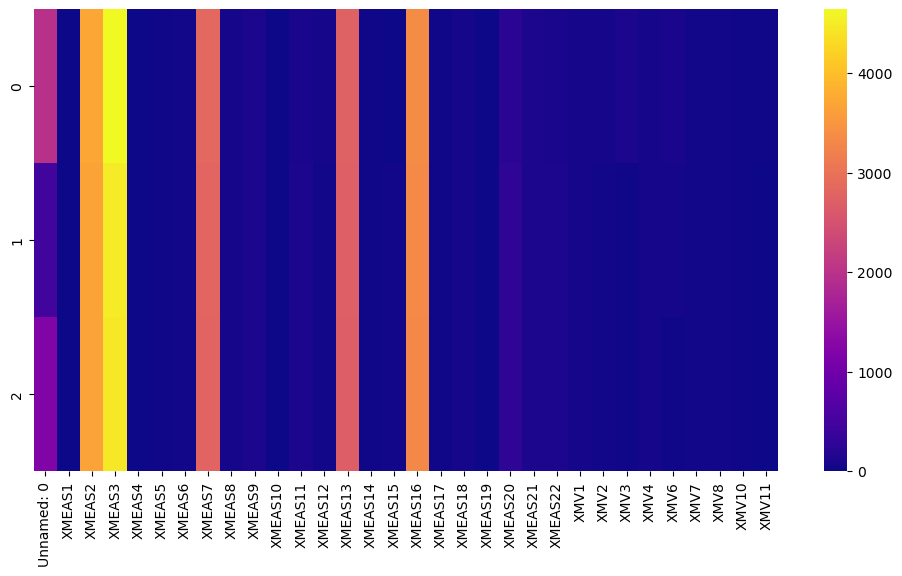

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(cluster_centers,cmap='plasma',)

In [15]:
from sklearn.multioutput import MultiOutputRegressor
target_column_names = ['XMEAS2', 'XMEAS3']

# Separate features and targets
X_train = train_data.drop(columns=target_column_names + ['cluster'])
y_train = train_data[target_column_names]


In [13]:
X_train

,Unnamed: 0,XMEAS1,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,XMEAS11,...,XMEAS22,XMV1,XMV2,XMV3,XMV4,XMV6,XMV7,XMV8,XMV10,XMV11
1862,1863,0.480213,9.067194,32.725187,48.054642,2745.224993,63.260512,122.872400,0.001775,92.747669,...,92.554405,63.734186,53.836335,47.277055,59.620158,0.280109,38.608366,46.645899,37.019873,14.731267
1955,1956,0.000027,8.995696,28.349928,43.839549,2804.719236,66.131368,122.904081,0.281906,88.513820,...,84.180251,63.139502,54.027067,100.000000,59.493402,38.630046,38.225050,46.396954,33.550393,16.261417
890,891,0.273933,9.199620,32.380402,47.098902,2799.473288,65.699406,122.916009,0.211435,91.943424,...,92.268005,63.077080,53.001469,27.019916,60.540959,25.817430,37.229287,46.471993,36.042504,12.307888
1022,1023,0.330246,9.300566,30.979578,46.726718,2774.691240,64.938856,122.906748,0.796694,93.325463,...,92.994791,62.828429,53.762272,32.316043,60.386065,100.000000,35.484138,45.561092,35.277257,13.302630
1330,1331,0.301292,9.208595,33.359219,48.629500,2794.491238,65.301117,122.910900,0.007438,92.159059,...,93.230190,63.329685,53.421767,29.552059,60.757777,1.207753,37.511177,46.070031,36.745561,11.805530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,400,0.301491,9.426580,32.346688,48.064993,2800.497065,64.904159,122.923031,0.401949,92.508703,...,93.217662,63.167507,53.838653,29.592038,61.410518,49.076322,36.689868,46.267110,36.295872,10.245680
1418,1419,0.166630,9.336048,31.799642,46.901805,2754.934156,65.435405,122.903793,0.002738,91.732439,...,91.239854,62.775224,52.433149,16.470089,61.083833,0.303518,37.768845,47.098118,36.188862,9.459031
1606,1607,0.218390,9.318647,32.068244,46.964195,2808.218050,64.960906,122.907772,0.283214,91.546949,...,91.864748,62.877846,53.025646,21.395957,60.604887,35.063837,37.248220,46.316069,35.653530,12.854509
1089,1090,0.118537,9.326128,32.530733,47.394266,2777.798641,65.472377,122.878817,0.004024,91.772290,...,91.396074,62.453789,52.620769,11.644621,61.306874,0.684829,37.276515,46.933861,35.662882,12.278306


In [16]:
train_data

,Unnamed: 0,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,...,XMV1,XMV2,XMV3,XMV4,XMV6,XMV7,XMV8,XMV10,XMV11,cluster
1862,1863,0.480213,3710.029975,4512.026828,9.067194,32.725187,48.054642,2745.224993,63.260512,122.872400,...,63.734186,53.836335,47.277055,59.620158,0.280109,38.608366,46.645899,37.019873,14.731267,2
1955,1956,0.000027,3670.830620,4512.762715,8.995696,28.349928,43.839549,2804.719236,66.131368,122.904081,...,63.139502,54.027067,100.000000,59.493402,38.630046,38.225050,46.396954,33.550393,16.261417,0
890,891,0.273933,3659.839802,4422.152203,9.199620,32.380402,47.098902,2799.473288,65.699406,122.916009,...,63.077080,53.001469,27.019916,60.540959,25.817430,37.229287,46.471993,36.042504,12.307888,2
1022,1023,0.330246,3669.680746,4505.711027,9.300566,30.979578,46.726718,2774.691240,64.938856,122.906748,...,62.828429,53.762272,32.316043,60.386065,100.000000,35.484138,45.561092,35.277257,13.302630,1
1330,1331,0.301292,3662.601021,4469.890645,9.208595,33.359219,48.629500,2794.491238,65.301117,122.910900,...,63.329685,53.421767,29.552059,60.757777,1.207753,37.511177,46.070031,36.745561,11.805530,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,400,0.301491,3677.628536,4460.547908,9.426580,32.346688,48.064993,2800.497065,64.904159,122.923031,...,63.167507,53.838653,29.592038,61.410518,49.076322,36.689868,46.267110,36.295872,10.245680,1
1418,1419,0.166630,3642.639030,4372.248327,9.336048,31.799642,46.901805,2754.934156,65.435405,122.903793,...,62.775224,52.433149,16.470089,61.083833,0.303518,37.768845,47.098118,36.188862,9.459031,2
1606,1607,0.218390,3651.489278,4420.225884,9.318647,32.068244,46.964195,2808.218050,64.960906,122.907772,...,62.877846,53.025646,21.395957,60.604887,35.063837,37.248220,46.316069,35.653530,12.854509,2
1089,1090,0.118537,3624.735583,4409.161869,9.326128,32.530733,47.394266,2777.798641,65.472377,122.878817,...,62.453789,52.620769,11.644621,61.306874,0.684829,37.276515,46.933861,35.662882,12.278306,2


In [17]:
y_train

,XMEAS2,XMEAS3
1862,3710.029975,4512.026828
1955,3670.830620,4512.762715
890,3659.839802,4422.152203
1022,3669.680746,4505.711027
1330,3662.601021,4469.890645
...,...,...
399,3677.628536,4460.547908
1418,3642.639030,4372.248327
1606,3651.489278,4420.225884
1089,3624.735583,4409.161869


In [18]:
print(train_data[target_column_names].dtypes)

XMEAS2    float64
XMEAS3    float64
dtype: object


In [19]:
for col in target_column_names:
    print(f"Column: {col}, Unique values: {train_data[col].unique()}")

Column: XMEAS2, Unique values: [3710.029975 3670.83062  3659.839802 ... 3651.489278 3624.735583
 3669.378606]
Column: XMEAS3, Unique values: [4512.026828 4512.762715 4422.152203 ... 4420.225884 4409.161869
 4481.892584]


In [20]:
y_train

,XMEAS2,XMEAS3
1862,3710.029975,4512.026828
1955,3670.830620,4512.762715
890,3659.839802,4422.152203
1022,3669.680746,4505.711027
1330,3662.601021,4469.890645
...,...,...
399,3677.628536,4460.547908
1418,3642.639030,4372.248327
1606,3651.489278,4420.225884
1089,3624.735583,4409.161869


In [21]:
from lightgbm import LGBMRegressor
from lightgbm.basic import LightGBMError

X_train.columns = ["".join(c if c.isalnum() else "_" for c in str(col)) for col in X_train.columns]

try:
    # Train MultiOutputRegressor with LGBMRegressor
    model = MultiOutputRegressor(LGBMRegressor())
    model.fit(X_train, y_train)
except LightGBMError as e:
    print(f"LightGBM Error: {str(e)}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7646
[LightGBM] [Info] Number of data points in the train set: 1396, number of used features: 30
[LightGBM] [Info] Start training from score 3662.804788
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7646
[LightGBM] [Info] Number of data points in the train set: 1396, number of used features: 30
[LightGBM] [Info] Start training from score 4461.433418


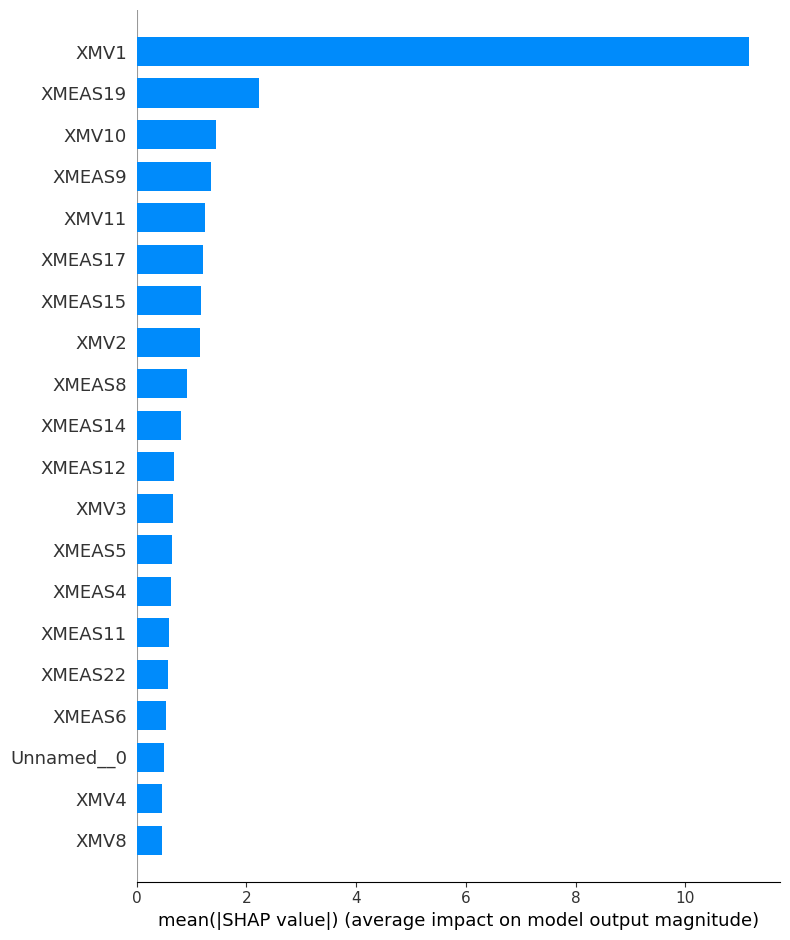

In [22]:
# Use SHAP values for feature importance
explainer = shap.TreeExplainer(model.estimators_[0])  # Assuming you have only one regressor
shap_values = explainer.shap_values(X_train)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

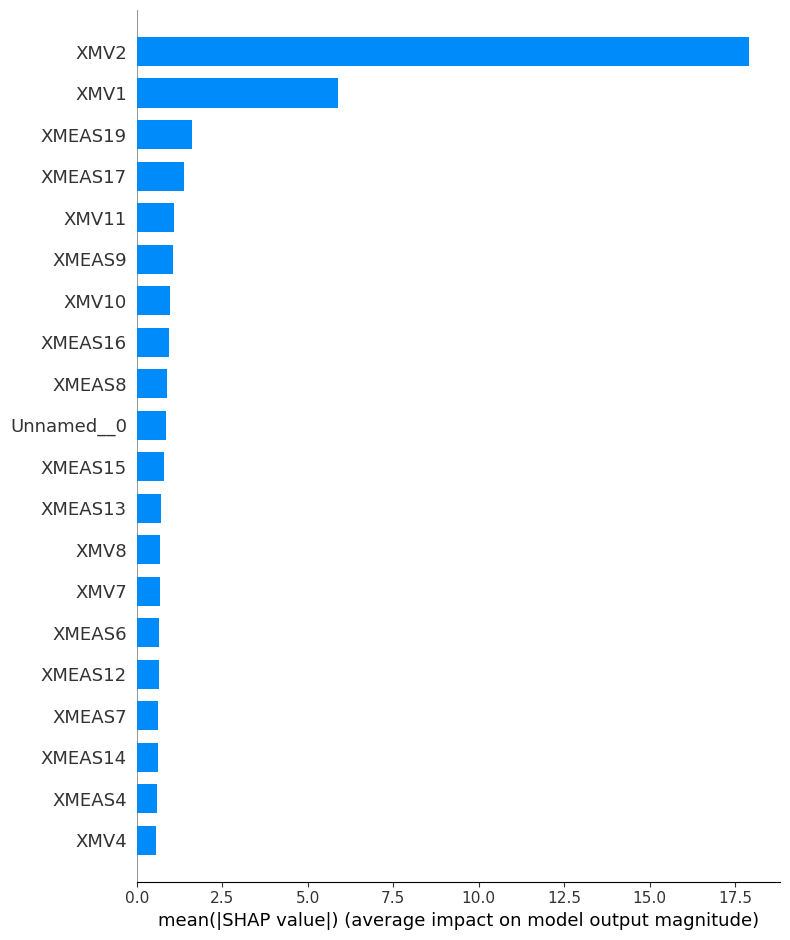

In [25]:
# Use SHAP values for feature importance
explainers = [shap.TreeExplainer(estimator) for estimator in model.estimators_]
shap_values_list = [explainer.shap_values(X_train) for explainer in explainers]

# Combine SHAP values if you have multiple regressors
shap_values = np.mean(shap_values_list, axis=0)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")